In [52]:
import pandas as pd  #for data manipulation operations
import numpy as np   #for linear algebra

#Libraries for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle

In [53]:
df = pd.read_csv("../datasets/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,34.017334,34.443333,32.748669,33.475334,33.475334,179971500
1,2020-03-31,33.416668,36.197334,33.133331,34.933334,34.933334,266572500
2,2020-04-01,33.599998,34.263332,31.673332,32.104000,32.104000,200298000
3,2020-04-02,32.068668,32.950668,29.760000,30.298000,30.298000,297876000
4,2020-04-03,33.966667,34.366001,31.226000,32.000668,32.000668,338431500
...,...,...,...,...,...,...,...
1002,2024-03-22,166.690002,171.199997,166.300003,170.830002,170.830002,75454700
1003,2024-03-25,168.759995,175.240005,168.729996,172.630005,172.630005,74228600
1004,2024-03-26,178.580002,184.250000,177.380005,177.669998,177.669998,113186200
1005,2024-03-27,181.410004,181.910004,176.000000,179.830002,179.830002,81804000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [55]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [56]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,218.368810,223.220435,213.096422,218.269276,218.269276,1.203738e+08
std,75.241147,76.754534,73.443938,75.039996,75.039996,6.712120e+07
min,32.068668,32.950668,29.760000,30.298000,30.298000,2.940180e+07
25%,179.975006,184.014999,176.070000,180.319999,180.319999,7.683780e+07
50%,224.836670,230.000000,219.169998,224.526672,224.526672,1.034160e+08
75%,263.455002,268.186676,258.281678,262.944992,262.944992,1.410429e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,6.663786e+08


In [57]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [58]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [59]:
df.index

DatetimeIndex(['2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-13',
               ...
               '2024-03-15', '2024-03-18', '2024-03-19', '2024-03-20',
               '2024-03-21', '2024-03-22', '2024-03-25', '2024-03-26',
               '2024-03-27', '2024-03-28'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [60]:
df.index = df.index.strftime('%m/%d/%Y')

In [61]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03/30/2020,34.017334,34.443333,32.748669,33.475334,33.475334,179971500
03/31/2020,33.416668,36.197334,33.133331,34.933334,34.933334,266572500
04/01/2020,33.599998,34.263332,31.673332,32.104000,32.104000,200298000
04/02/2020,32.068668,32.950668,29.760000,30.298000,30.298000,297876000
04/03/2020,33.966667,34.366001,31.226000,32.000668,32.000668,338431500


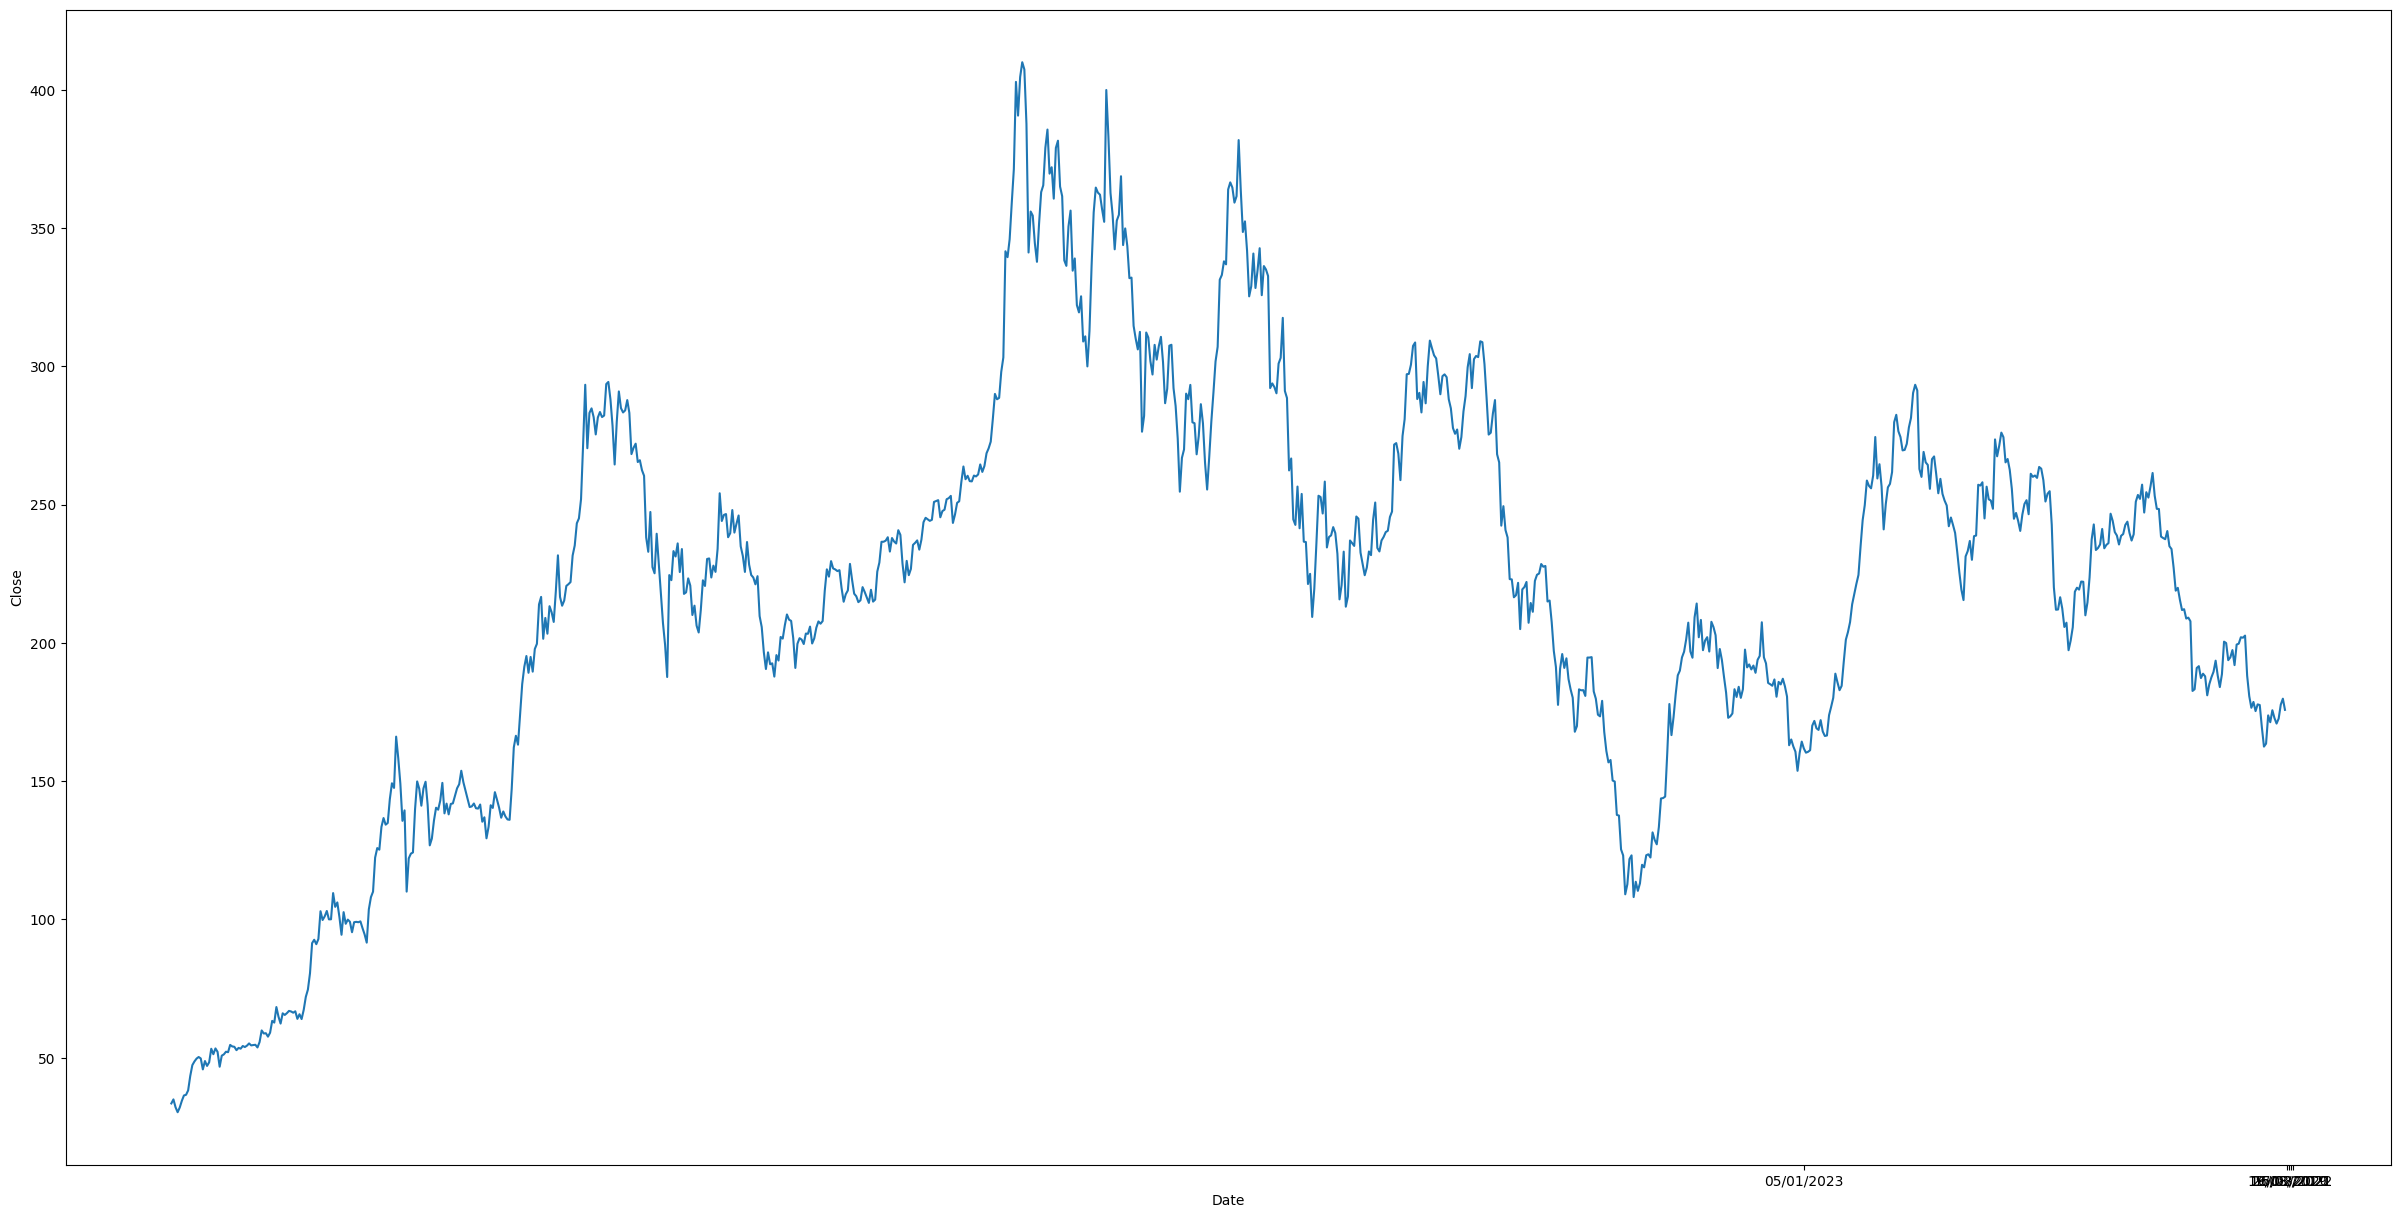

In [64]:
data=df.copy()
plt.figure(figsize=(30,15))
ax=sns.lineplot(x=data.index,y=data['Close'])
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.show()

In [65]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03/30/2020,34.017334,34.443333,32.748669,33.475334,33.475334,179971500
03/31/2020,33.416668,36.197334,33.133331,34.933334,34.933334,266572500
04/01/2020,33.599998,34.263332,31.673332,32.104000,32.104000,200298000
04/02/2020,32.068668,32.950668,29.760000,30.298000,30.298000,297876000
04/03/2020,33.966667,34.366001,31.226000,32.000668,32.000668,338431500
...,...,...,...,...,...,...
03/22/2024,166.690002,171.199997,166.300003,170.830002,170.830002,75454700
03/25/2024,168.759995,175.240005,168.729996,172.630005,172.630005,74228600
03/26/2024,178.580002,184.250000,177.380005,177.669998,177.669998,113186200


In [66]:
ma_day = [30, 60, 120,150]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        data[column_name] = data['Close'].rolling(ma).mean()

In [67]:
data

,Open,High,Low,Close,Adj Close,Volume,MA for 30 days,MA for 60 days,MA for 120 days,MA for 150 days
Date,,,,,,,,,,
03/30/2020,34.017334,34.443333,32.748669,33.475334,33.475334,179971500,NaN,NaN,NaN,NaN
03/31/2020,33.416668,36.197334,33.133331,34.933334,34.933334,266572500,NaN,NaN,NaN,NaN
04/01/2020,33.599998,34.263332,31.673332,32.104000,32.104000,200298000,NaN,NaN,NaN,NaN
04/02/2020,32.068668,32.950668,29.760000,30.298000,30.298000,297876000,NaN,NaN,NaN,NaN
04/03/2020,33.966667,34.366001,31.226000,32.000668,32.000668,338431500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
03/22/2024,166.690002,171.199997,166.300003,170.830002,170.830002,75454700,185.104334,199.584000,218.202667,224.800733
03/25/2024,168.759995,175.240005,168.729996,172.630005,172.630005,74228600,184.406334,198.103834,217.544583,224.515000
03/26/2024,178.580002,184.250000,177.380005,177.669998,177.669998,113186200,184.057667,196.845334,216.970750,224.157600


In [68]:
data['MA for 150 days'].isna().sum()

149

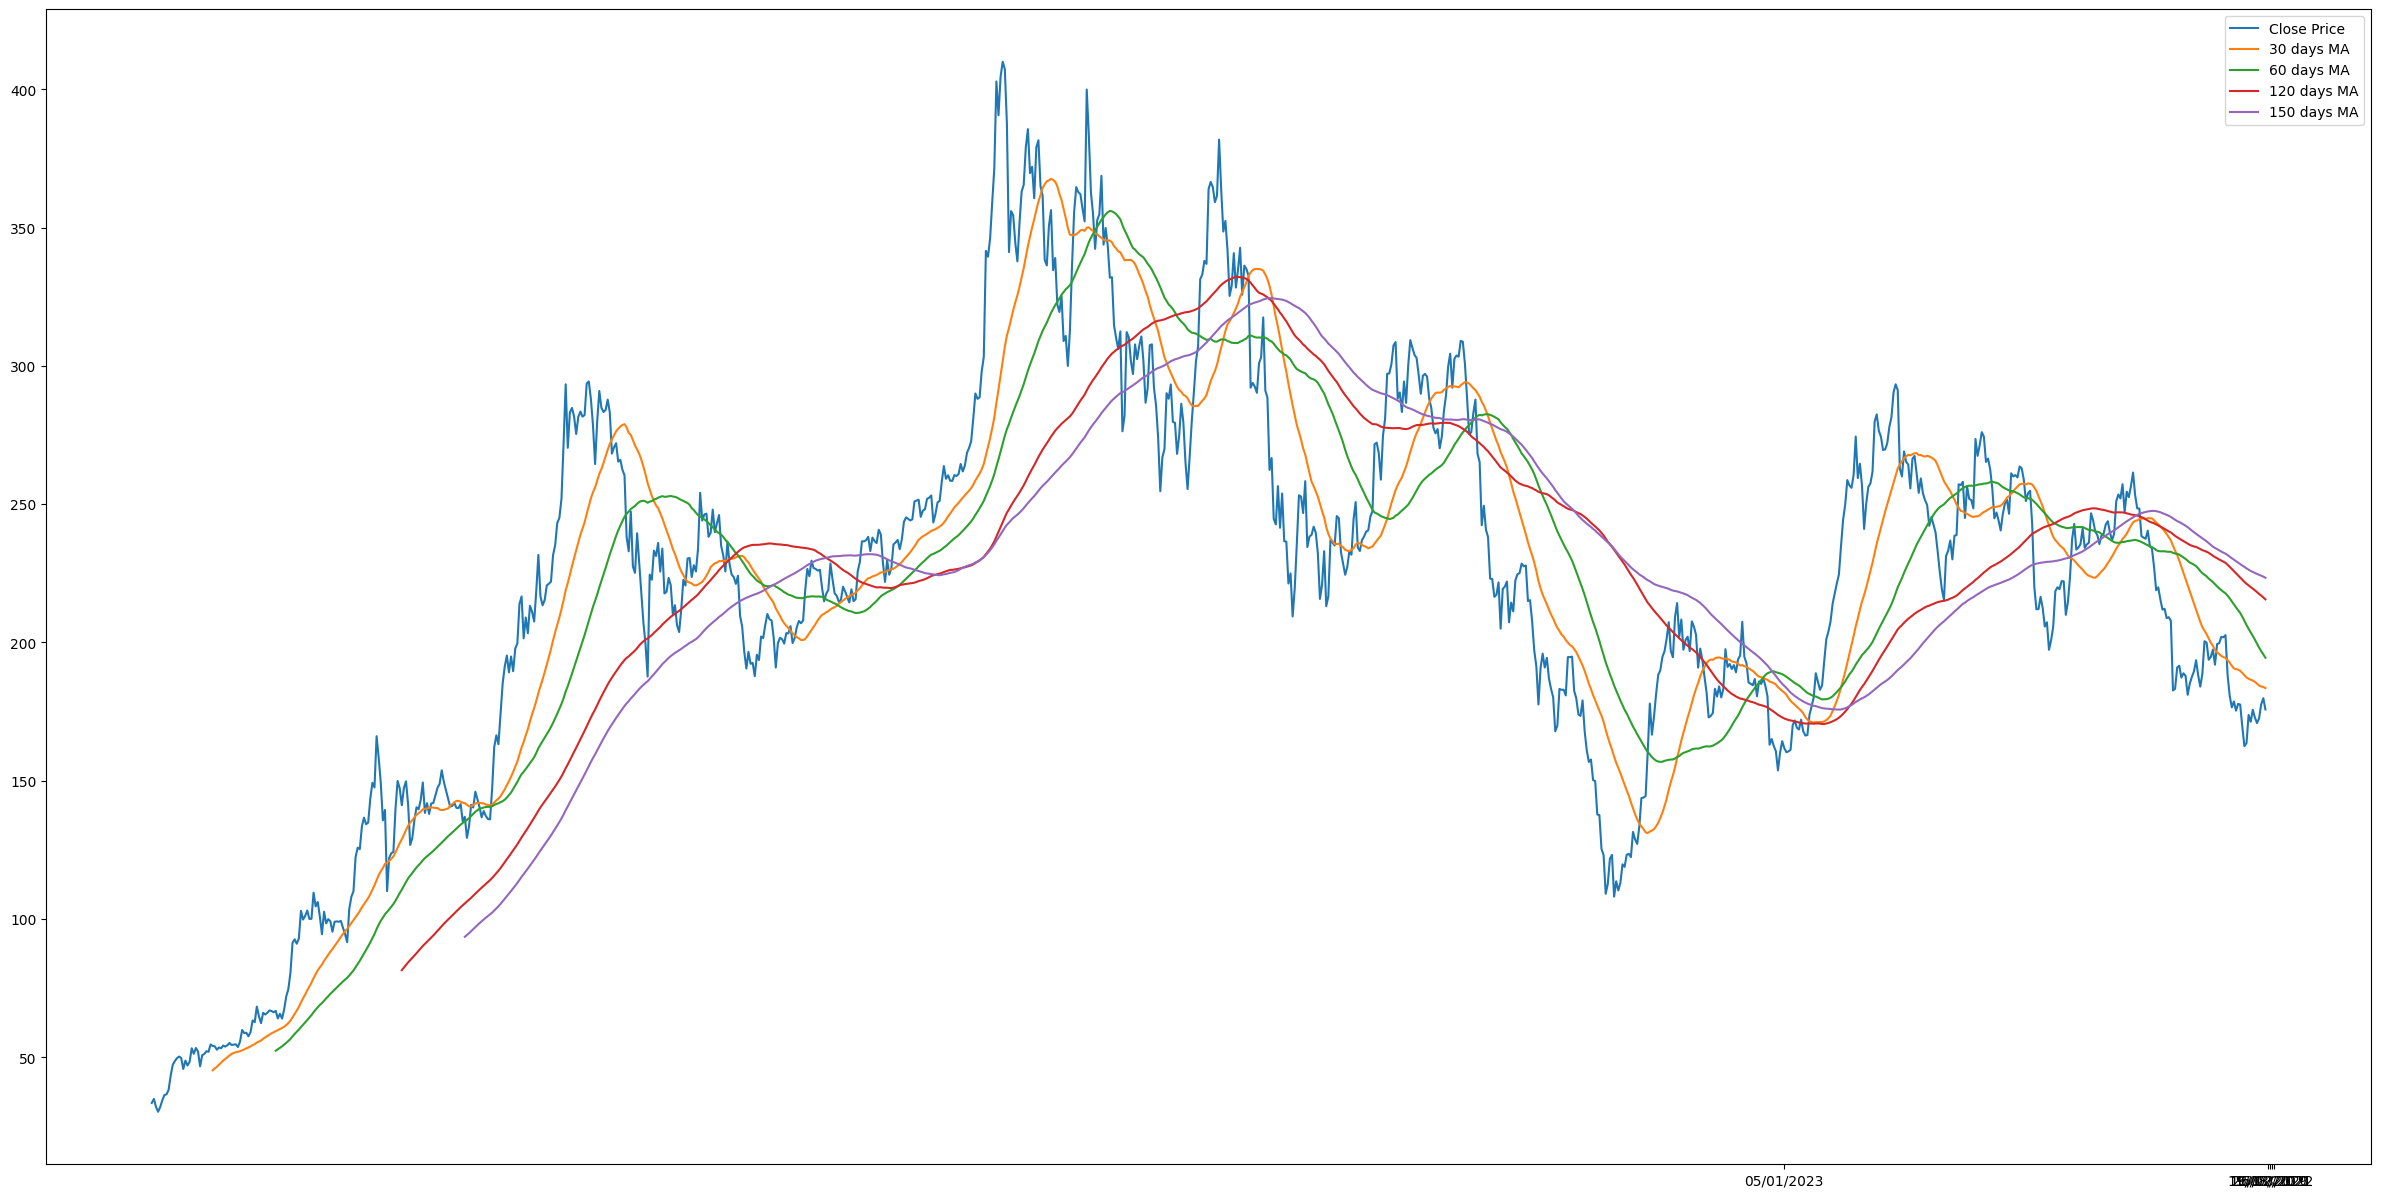

In [69]:
plt.figure(figsize=(30,15))
plt.plot(data['Close'],label='Close Price')
plt.plot(data['MA for 30 days'],label='30 days MA')
plt.plot(data['MA for 60 days'],label='60 days MA')
plt.plot(data['MA for 120 days'],label='120 days MA')
plt.plot(data['MA for 150 days'],label='150 days MA')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()

In [70]:
# Creating a new dataframe with only 'Close'
new_df = data['Close']
new_df.index = data.index

final_df=new_df.values

train_data=final_df[0:646,]
test_data=final_df[646:,]

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['Close'] = train_data
train_df.index = new_df[0:646].index
test_df['Close'] = test_data
test_df.index = new_df[646:].index

In [43]:
print("train_data: ", train_df.shape)
print("test_data: ", test_df.shape)

train_data:  (646, 1)
test_data:  (361, 1)


In [71]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_df.reshape(-1,1))

X_train_data,y_train_data=[],[]

for i in range(60,len(train_df)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)

X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))

In [74]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [76]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train_data, y_train_data, epochs = 150, batch_size = 32);

Epoch 1/150
19/19 [==============================] - 8s 45ms/step - loss: 0.0806
Epoch 2/150
19/19 [==============================] - 1s 45ms/step - loss: 0.0175
Epoch 3/150
19/19 [==============================] - 1s 44ms/step - loss: 0.0118
Epoch 4/150
19/19 [==============================] - 1s 44ms/step - loss: 0.0114
Epoch 5/150
19/19 [==============================] - 1s 44ms/step - loss: 0.0102
Epoch 6/150
19/19 [==============================] - 1s 45ms/step - loss: 0.0092
Epoch 7/150
19/19 [==============================] - 1s 44ms/step - loss: 0.0090
Epoch 8/150
19/19 [==============================] - 1s 44ms/step - loss: 0.0097
Epoch 9/150
19/19 [==============================] - 1s 43ms/step - loss: 0.0090
Epoch 10/150
19/19 [==============================] - 1s 44ms/step - loss: 0.0089
Epoch 11/150
19/19 [==============================] - 1s 45ms/step - loss: 0.0073
Epoch 12/150
19/19 [==============================] - 1s 44ms/step - loss: 0.0094
Epoch 13/150
19/19 [=====

In [77]:
input_data=new_df[len(new_df)-len(test_df)-60:].values
input_data=input_data.reshape(-1,1)
input_data=scaler.transform(input_data)

In [78]:
X_test=[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [79]:
predicted=model.predict(X_test)
predicted=scaler.inverse_transform(predicted)

12/12 [==============================] - 1s 15ms/step


In [80]:
test_df['Predictions']=predicted

In [82]:
test_df

,Close,Predictions
Date,,
10/20/2022,207.279999,217.402496
10/21/2022,214.440002,216.949356
10/24/2022,211.250000,215.456482
10/25/2022,222.419998,213.734055
10/26/2022,224.639999,214.656479
...,...,...
03/22/2024,170.830002,173.213303
03/25/2024,172.630005,174.264435
03/26/2024,177.669998,174.580307


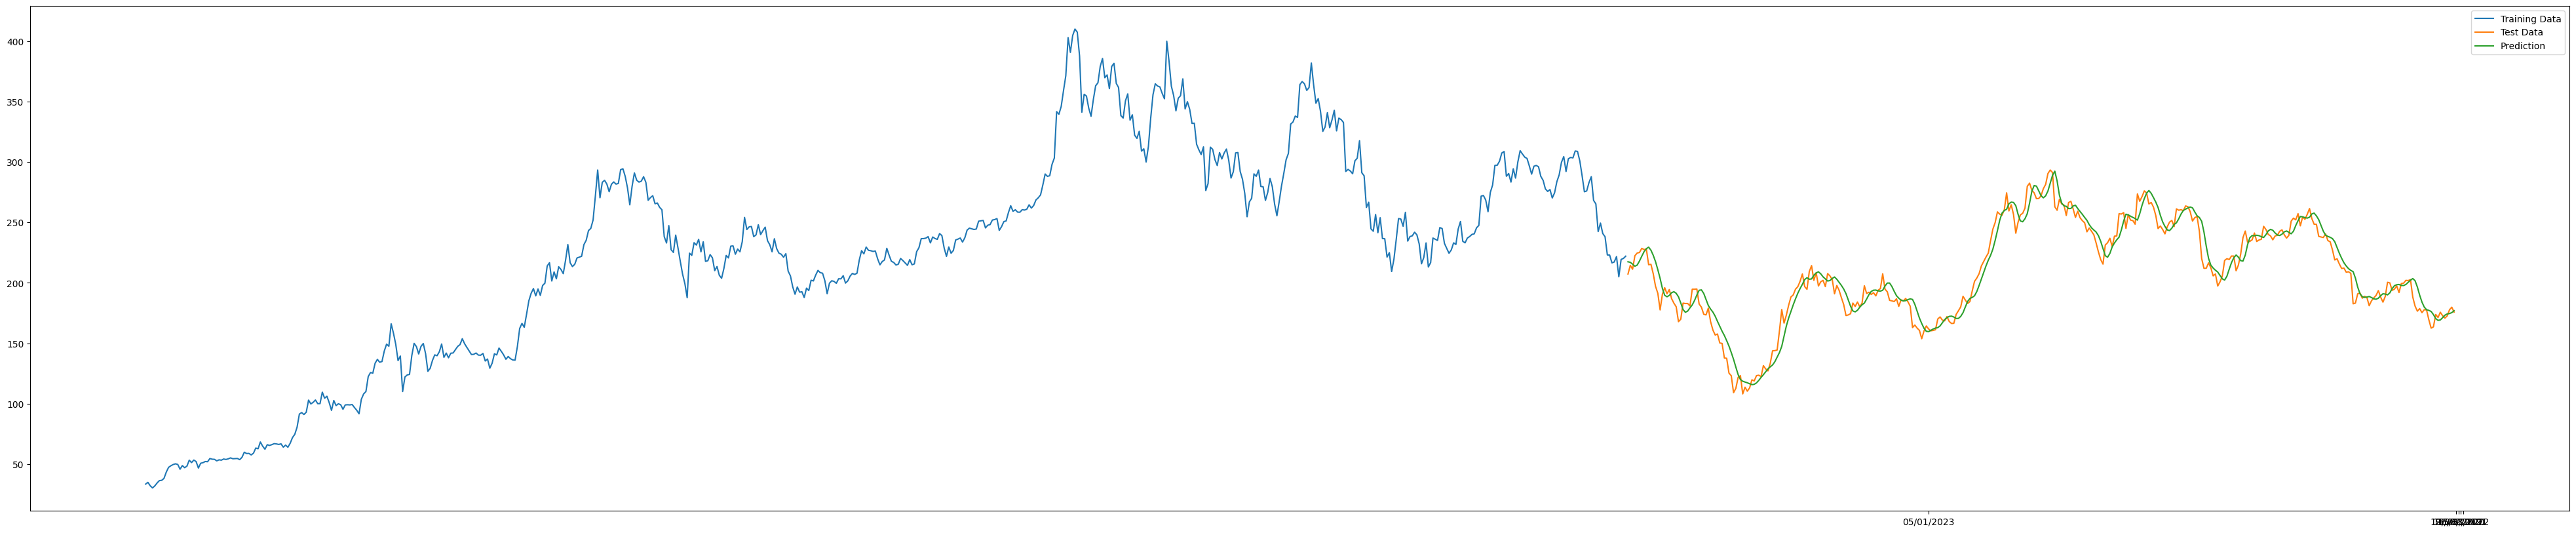

In [81]:
plt.figure(figsize=(50,10))
plt.plot(train_df['Close'],label='Training Data')
plt.plot(test_df['Close'],label='Test Data')
plt.plot(test_df['Predictions'],label='Prediction')
plt.xticks(['19/08/2019','16/03/2020','26/02/2021','15/03/2022','05/01/2023'])
plt.legend()
plt.show()